In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Loading in data

In [2]:
data=pd.read_csv("House Price India.csv")

In [3]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


Columns information and Data summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [5]:
stats=data["Price"].describe().reset_index()
stats["Price"]=round(stats["Price"], 2)
stats


,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


Checking for any missing or duplicate values

In [6]:
data.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [9]:
data.groupby("lot area")["Price"].mean()


lot area
520        700000.0
635        256950.0
638        516500.0
676        304000.0
681        339950.0
             ...   
641203     849900.0
843309     550000.0
982278     790000.0
982998     998000.0
1074218    542500.0
Name: Price, Length: 7451, dtype: float64

In [10]:
round(data.groupby("number of bathrooms")["Price"].mean(), 2)

number of bathrooms
0.50     280166.67
0.75     302156.40
1.00     339168.40
1.25     564064.29
1.50     404592.21
1.75     451266.33
2.00     457938.03
2.25     533343.27
2.50     551141.27
2.75     663947.42
3.00     707063.53
3.25     954680.99
3.50     921950.50
3.75    1133249.37
4.00    1137396.14
4.25    1524722.32
4.50    1374243.85
4.75    2090529.41
5.00    1598533.33
5.25    1781958.33
5.50    2390625.00
5.75    3055000.00
6.00    2426666.67
6.25    3095000.00
6.50    2240000.00
6.75    2735000.00
7.50     450000.00
7.75    6890000.00
8.00    4990000.00
Name: Price, dtype: float64

In [11]:
data.groupby("living area")["Price"].mean()

living area
370       276000.0
380       245000.0
420       280000.0
430        80000.0
440       290000.0
           ...    
9640     4670000.0
9890     6890000.0
10040    7060000.0
12050    7700000.0
13540    2280000.0
Name: Price, Length: 865, dtype: float64

In [12]:
result=data.groupby("number of bedrooms")["Price"].mean().sort_values(ascending=False)
round(result, 2)


number of bedrooms
8     1208454.55
7     1016543.90
6      837581.48
10     820000.00
9      776666.33
5      773766.40
33     640000.00
4      636198.81
11     520000.00
3      463277.56
2      398547.57
1      308963.75
Name: Price, dtype: float64

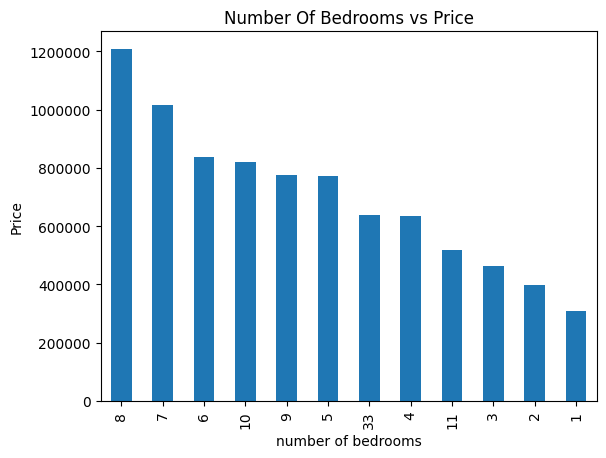

In [13]:
data.groupby("number of bedrooms")["Price"].mean().sort_values(ascending=False).plot(kind = "bar")
plt.title("Number Of Bedrooms vs Price")
plt.ylabel("Price")
plt.ticklabel_format(style='plain', axis='y')

In [14]:
x=data[["number of bedrooms","number of bathrooms","living area"]]
y=data["Price"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [16]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
pred=lr.predict(x_test)
pred

array([ 320103.45798859,  176067.80909142, 1051904.3490288 , ...,
        478104.05468578,  910171.64143764,   49862.0092048 ])

In [18]:
mse=mean_squared_error(y_test, pred)
mae=mean_absolute_error(y_test, pred)

In [19]:
print(mse)
print(mae)

57569760747.70988
164086.56302180735


In [20]:
round(data["Price"].describe(), 2)

count      14619.00
mean      538806.28
std       367229.36
min        78000.00
25%       320000.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: Price, dtype: float64